In [4]:
import pandas as pd
import smartspider

In [5]:
df = pd.read_csv('_candidates_full.csv', sep=';')

#Select only with questionary filled out
df = df[df.offene_aussenpolitik.notna()]

df['firstname'] = df['firstname'].fillna('')
df['lastname'] = df['lastname'].fillna('')
df['partyAbbreviation'] = df['partyAbbreviation'].fillna('')
df['partyAbbreviation'] = df['partyAbbreviation'].str.strip()
df['liste'] = df['liste'].fillna('')
df['listenplatz_0_nr'] = df['listenplatz_0_nr'].fillna('')


df_data = df[['id', 'firstname', 'lastname', 'partyAbbreviation', 'place', 'liste', 'listenplatz_0_nr', 'offene_aussenpolitik', 'liberale_wirtschaftspolitik',
             'restriktive_finanzpolitik', 'law_order', 'restriktive_migrationspolitik', 'ausgebauter_umweltschutz',
             'ausgebauter_sozialstaat', 'liberale_gesellschaft']]

df_data['sum'] = (df_data.offene_aussenpolitik + df_data.liberale_wirtschaftspolitik +
                 df_data.restriktive_finanzpolitik + df_data.law_order + df_data.restriktive_migrationspolitik
                 + df_data.ausgebauter_umweltschutz + df_data.ausgebauter_sozialstaat + df_data.liberale_gesellschaft)

#Create Fraction
df_data['fraction'] = df_data.partyAbbreviation
df_data.loc[df_data.partyAbbreviation.isin(['SP', 'JUSO']), 'fraction'] = 'sp'
df_data.loc[df_data.partyAbbreviation.isin(['Grüne', 'JG']), 'fraction'] = 'grüne'
df_data.loc[df_data.partyAbbreviation.isin(['CVP', 'JCVP']), 'fraction'] = 'cvp'
df_data.loc[df_data.partyAbbreviation.isin(['glp', 'jglp']), 'fraction'] = 'glp'
df_data.loc[df_data.partyAbbreviation.isin(['FDP', 'jf']), 'fraction'] = 'fdp'
df_data.loc[df_data.partyAbbreviation.isin(['BDP', 'JBDP']), 'fraction'] = 'bdp'
df_data.loc[df_data.partyAbbreviation.isin(['SVP', 'JSVP']), 'fraction'] = 'svp'
df_data.loc[df_data.partyAbbreviation.isin(['CSP', 'CSPO', 'JCSPO']), 'fraction'] = 'csp'
#df_data = df_data.sort_values(['fraction', 'sum'], ascending=False)

#Create Scale from party
#Create Fraction
df_data['scale'] = 40
df_data.loc[df_data.partyAbbreviation.isin(['PdA']), 'scale'] = 0
df_data.loc[df_data.partyAbbreviation.isin(['SP', 'JUSO']), 'scale'] = 10
df_data.loc[df_data.partyAbbreviation.isin(['solid.']), 'scale'] = 11
df_data.loc[df_data.partyAbbreviation.isin(['Grüne', 'JG']), 'scale'] = 20
df_data.loc[df_data.partyAbbreviation.isin(['CVP', 'JCVP']), 'scale'] = 50
df_data.loc[df_data.partyAbbreviation.isin(['EVP', 'jevp']), 'scale'] = 51
df_data.loc[df_data.partyAbbreviation.isin(['glp', 'jglp']), 'scale'] = 30
df_data.loc[df_data.partyAbbreviation.isin(['FDP', 'jf']), 'scale'] = 60
df_data.loc[df_data.partyAbbreviation.isin(['up!']), 'scale'] = 61
df_data.loc[df_data.partyAbbreviation.isin(['BDP', 'JBDP']), 'scale'] = 70
df_data.loc[df_data.partyAbbreviation.isin(['SVP', 'JSVP']), 'scale'] = 90
df_data.loc[df_data.partyAbbreviation.isin(['EDU']), 'scale'] = 80
df_data.loc[df_data.partyAbbreviation.isin(['SD', 'Lega', 'MCG']), 'scale'] = 100
df_data = df_data.sort_values(['scale', 'partyAbbreviation', 'sum'], ascending=True)

#df_data = df_data.sort_values('restriktive_migrationspolitik', ascending=False)
#df_data = df_data.sort_values(['partyAbbreviation', 'sum'], ascending=False)

names = []
values = []
for i, row in df_data.iterrows():

    #Do not use object. Filesize!
    """
    names.append({
        'id': row['id'],
        'firstname': row['firstname'],
        'lastname': row['lastname'],
        'party': row['partyAbbreviation'],
        'place': row['place'],
        'liste': row['liste'],
        'nr': row['listenplatz_0_nr']
    })
    """
    names.append([
        row['id'],
        row['firstname'],
        row['lastname'],
        row['partyAbbreviation'],
        row['place'],
        row['liste'],
        row['listenplatz_0_nr']
    ])
    values.append([round(row['offene_aussenpolitik']), round(row['liberale_wirtschaftspolitik']),
             round(row['restriktive_finanzpolitik']), round(row['law_order']), round(row['restriktive_migrationspolitik']),
             round(row['ausgebauter_umweltschutz']),
             round(row['ausgebauter_sozialstaat']),
             round(row['liberale_gesellschaft'])])

    
#Append TEST REMOVE!
"""
#values.append([100, 100, 100, 100, 100, 100, 100, 100])
values.append([20, 20, 20, 100, 20, 20, 20, 20])
names.append({
        'firstname': 'TEST2',
        'lastname': 'TEST2',
        'party': 'CVP'
    })
"""
exportstring = 'exports.profile = ' + str(names)
exportstring += '\nexports.spider = ' +str(values)

with open('../src/data.js', 'w') as f:
    f.write(exportstring)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

[0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 0.0]


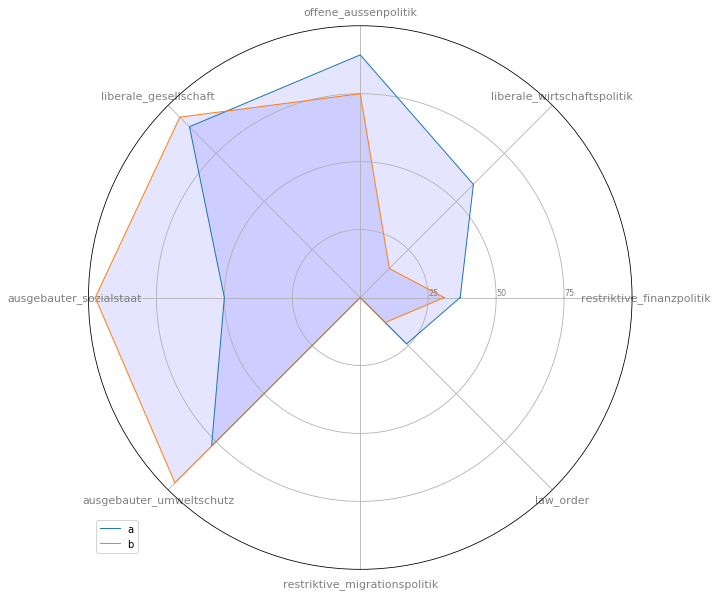

In [43]:
smartspider.plot_dataframe(df_data.head(2), ['a', 'b'])